In [1]:
#library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Here is a description of the columns from the kaggle page:
https://www.kaggle.com/radmirzosimov/telecom-users-dataset
<br>
<br>

<li>
    <b>customerID</b> - customer id
<br>
    <li>
        <b>gender</b> - client gender (male / female)
<br>
<li>
<b>SeniorCitizen</b> - is the client retired (1, 0)
<br>
<li>
<b>Partner</b> - is the client married (Yes, No)
<br>
<li>
<b>tenure</b> - how many months a person has been a client of the company
<br>
<li>
<b>PhoneService</b> - is the telephone service connected (Yes, No)
<br>
<li>
<b>MultipleLines</b> - are multiple phone lines connected (Yes, No, No phone service)
<br>
<li>
<b>InternetService</b> - client's Internet service provider (DSL, Fiber optic, No)
<br>
<li>
<b>OnlineSecurity</b> - is the online security service connected (Yes, No, No internet service)
<br>
<li>
<b>OnlineBackup</b> - is the online backup service activated (Yes, No, No internet service)
<br>
<li>
<b>DeviceProtection</b> - does the client have equipment insurance (Yes, No, No internet service)
<br>
<li>
<b>TechSupport</b> - is the technical support service connected (Yes, No, No internet service)
<br>
<li>
<b>StreamingTV</b> - is the streaming TV service connected (Yes, No, No internet service)
<br>
<li>
<b>StreamingMovies</b> - is the streaming cinema service activated (Yes, No, No internet service)
<br>
<li>
<b>Contract</b> - type of customer contract (Month-to-month, One year, Two year)
<br>
<li>
<b>PaperlessBilling</b> - whether the client uses paperless billing (Yes, No)
<br>
<li>
<b>PaymentMethod</b> - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
<br>
<li>
<b>MonthlyCharges</b> - current monthly payment
<br>
<li>
<b>TotalCharges</b> - the total amount that the client paid for the services for the entire time
<br>
<li>
    <b>Churn</b> - whether there was a churn (Yes or No)

In [2]:
df = pd.read_csv('telecom_users.csv')

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
#looking for null values
df.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#I want to see the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


It looks like TotalCharges is not a float type currently so I will convert that.  It looks like there are some null values after all in this column so I will coerce them and convert them to zeros.

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
#checking that the data type for TotalCharges was properly converted over
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [8]:
#Checking to see if this resolved
df.isna().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

There are now null values for total charges.  

In [9]:
df[df['TotalCharges'].isnull()]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


It looks like all of the rows with null total charge values are for customers with no tenure.  I assume this means total charges should be zero.

In [10]:
#converting values that were null here to zeros
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [11]:
#Checking to see if this resolved
df.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Next I want to cycle through the columns and get an idea of what values I am dealing with.

In [12]:
#Looking at values in each column
df_cols = df.columns.values.tolist()
for i in df_cols:
    print(i,'\n')
    print(df[i].unique(),'\n')
    print(df[i].value_counts(),'\n\n')

Unnamed: 0 

[1869 4528 6344 ... 5226 5390  860] 

0       1
1250    1
3311    1
1262    1
5356    1
       ..
6730    1
2632    1
4679    1
6726    1
2047    1
Name: Unnamed: 0, Length: 5986, dtype: int64 


customerID 

['7010-BRBUU' '9688-YGXVR' '9286-DOJGF' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ'] 

9399-APLBT    1
6741-EGCBI    1
5136-KCKGI    1
2024-BASKD    1
8606-CIQUL    1
             ..
2800-VEQXM    1
5650-VDUDS    1
5583-SXDAG    1
2692-PFYTJ    1
3780-YVMFA    1
Name: customerID, Length: 5986, dtype: int64 


gender 

['Male' 'Female'] 

Male      3050
Female    2936
Name: gender, dtype: int64 


SeniorCitizen 

[0 1] 

0    5020
1     966
Name: SeniorCitizen, dtype: int64 


Partner 

['Yes' 'No'] 

No     3082
Yes    2904
Name: Partner, dtype: int64 


Dependents 

['Yes' 'No'] 

No     4195
Yes    1791
Name: Dependents, dtype: int64 


tenure 

[72 44 38  4  2 70 33  1 39 55 52 30 60 50 32 51 69 42 14 62  5 63 67 40
 65 16 46 11 49 68 10 53 54 15  3 71  8 64 57 20 

A lot of these variables can be considered binary.  Most are simple yes/no variables and others are yes/no/other where the other value could also be no.

#### Binary variables:

Gender 
<br>
SeniorCitizen
<br>
Partner
<br>
Dependents
<br>
PhoneService
<br>
MultipleLines ***'No phone service' is an other value that can be considered 'No'***
<br>
InternetService ***(should split into 2 columns 'Fiber optic', and 'DSL' should be converted to yes in InternetService and InternetType should be created and keep the original values)***
<br>
OnlineSecurity - ***'No internet service' is an other value that can be considered 'No'***
<br>
OnlineBackup - ***'No internet service' is an other value that can be considered 'No'***
<br>
DeviceProtection - ***'No internet service' is an other value that can be considered 'No'***
<br>
TechSupport - ***'No internet service' is an other value that can be considered 'No'***
<br>
StreamingTV - ***'No internet service' is an other value that can be considered 'No'***
<br>
StreamingMovies - ***'No internet service' is an other value that can be considered 'No'***
<br>
PaperlessBilling
<br>
Churn

#### Not Binary:

tenure
<br>
Contract
<br>
PaymentMethod
<br>
MonthlyCharges
<br>
TotalCharges




In [13]:
#creating column specifically for the internet service type.
df['InternetType'] = df['InternetService']

In [14]:
#converting internet types to 'Yes' to make this a binary variable
df['InternetService'] = df['InternetService'].replace(['Fiber optic', 'DSL'],'Yes')

In [15]:
#Converting any 'No internet service' and 'No phone service' values to 'No' since they are essentially the same
df = df.replace('No internet service', 'No')
df = df.replace('No phone service', 'No')

In [16]:
#checking variable breakdown again
for i in df_cols:
    print(i,'\n')
    print(df[i].unique(),'\n')
    print(df[i].value_counts(),'\n\n')

Unnamed: 0 

[1869 4528 6344 ... 5226 5390  860] 

0       1
1250    1
3311    1
1262    1
5356    1
       ..
6730    1
2632    1
4679    1
6726    1
2047    1
Name: Unnamed: 0, Length: 5986, dtype: int64 


customerID 

['7010-BRBUU' '9688-YGXVR' '9286-DOJGF' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ'] 

9399-APLBT    1
6741-EGCBI    1
5136-KCKGI    1
2024-BASKD    1
8606-CIQUL    1
             ..
2800-VEQXM    1
5650-VDUDS    1
5583-SXDAG    1
2692-PFYTJ    1
3780-YVMFA    1
Name: customerID, Length: 5986, dtype: int64 


gender 

['Male' 'Female'] 

Male      3050
Female    2936
Name: gender, dtype: int64 


SeniorCitizen 

[0 1] 

0    5020
1     966
Name: SeniorCitizen, dtype: int64 


Partner 

['Yes' 'No'] 

No     3082
Yes    2904
Name: Partner, dtype: int64 


Dependents 

['Yes' 'No'] 

No     4195
Yes    1791
Name: Dependents, dtype: int64 


tenure 

[72 44 38  4  2 70 33  1 39 55 52 30 60 50 32 51 69 42 14 62  5 63 67 40
 65 16 46 11 49 68 10 53 54 15  3 71  8 64 57 20 

### Univariate and bivariate analysis

I want to start building some visualizations.  I will start with some distribution plots, but I want to add a hue parameter to see how the values relate to Churn.

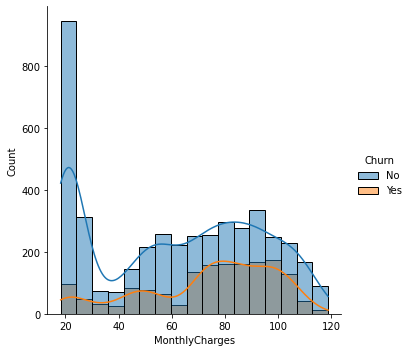

In [17]:
#distribution plot of monthly charges with Churn as hue
sns.displot(data=df,x='MonthlyCharges',kde=True, hue='Churn')

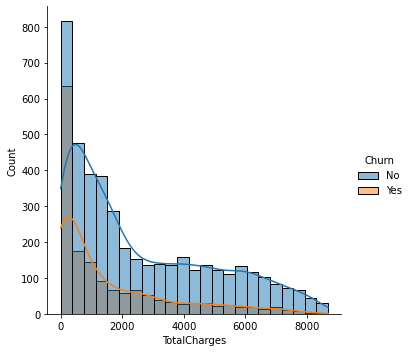

In [18]:
#distribution plot of total charges with churn as hue
sns.displot(data=df,x='TotalCharges',kde=True, hue='Churn')

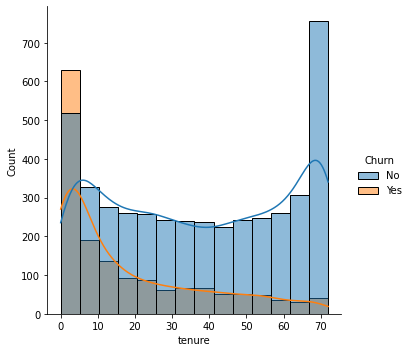

In [19]:
#tenure distribution plot with churn as hue
sns.displot(data=df,x='tenure',kde=True, hue='Churn')

It seems like we're losing a lot of new customers.  I want to zoom in on the customers with 10 or less months of tenure.

In [20]:
new_cust = df[df['tenure']<= 10]

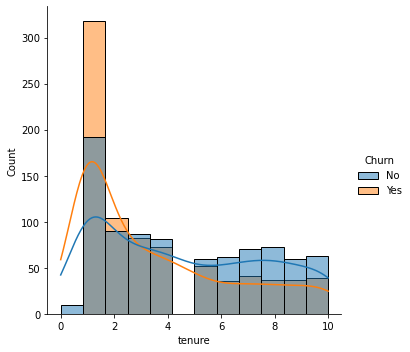

In [21]:
#only customers with 10 months or less tenure
sns.displot(data=new_cust,x='tenure',kde=True, hue='Churn')

In [22]:
new_cust[['tenure','Churn']].value_counts()

tenure  Churn
1       Yes      318
        No       192
2       Yes      104
        No        90
3       No        87
        Yes       82
4       No        81
        Yes       73
8       No        73
7       No        70
10      No        63
6       No        62
9       No        60
5       No        59
        Yes       52
7       Yes       41
10      Yes       39
8       Yes       37
9       Yes       37
6       Yes       36
0       No        10
dtype: int64

There are a lot of customers canceling in the first few months.  I want to explore the counts of customers that cancel and see if the trend of newer customers canceling service plays out.  First I will create a pivot table with the customers that canceled.

In [23]:
#pivot table with counts by tenure number of customers that canceled.
tenure_piv = pd.pivot_table(df[df['Churn']== 'Yes'],index='tenure',values='Churn',aggfunc='count')

In [24]:
#look at the top 10 canceled tenure months
tenure_piv.sort_values(by=['Churn'], ascending=False).head(10)

,Churn
tenure,
1,318
2,104
3,82
4,73
5,52
7,41
10,39
8,37
9,37


<AxesSubplot:xlabel='tenure', ylabel='Churn'>

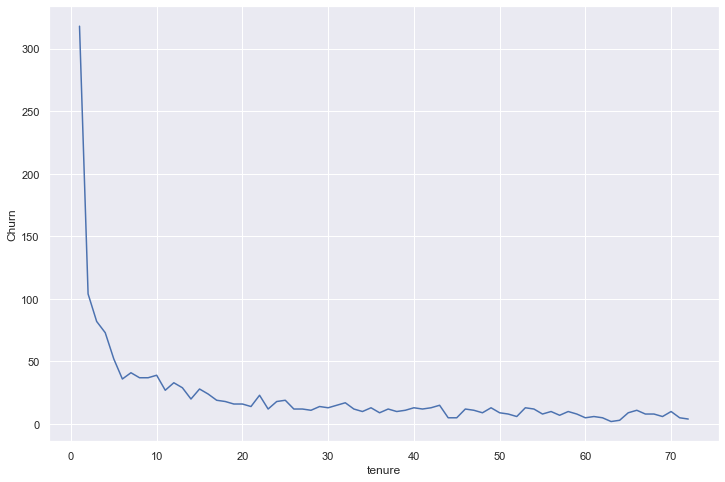

In [25]:
#line chart with tenure compared with customers who canceled
sns.set_theme()
plt.figure(figsize=(12,8))
sns.lineplot(data=tenure_piv, x='tenure', y='Churn')

Lower tenure does appear to correlate with higher churn rates. However this is probably because we have more newer customers than old ones.  We should normalize this data to get a better understanding of how tenure is related to churn.  I calculated the percentage of customers that cancelled by their tenure.  I did this in excel since it was quicker to accomplish and I imported the data.

In [26]:
#I found calculating the % of churners by tenure was easier to calculate in excel.
df_perc = pd.read_csv('telecom churn percent.csv')

In [27]:
df_perc.head()

,tenure,ChurnPercent
0,0,0.00
1,1,0.62
2,2,0.54
3,3,0.49
4,4,0.47


In [28]:
#merging churn % with current dataframe, also saving df_temp before joining tables
df = pd.merge(df,df_perc,how='inner', on='tenure')

I had a row count issue and it took some time to figure out.  It turns out dropping the customer id column before removing duplicates caused an issue where several customers had the exact same values.  

In [29]:
#dropping unnecessary columns, but before removing the unique identifier of customer id that way I won't lose rows
df = df.drop_duplicates()
df = df.drop(['Unnamed: 0','customerID'], axis=1)

In [30]:
#creating separate dataframe and dropping duplicates.
churn = df[['tenure','ChurnPercent']]
churn = churn.drop_duplicates()

In [31]:
#This table gives us the tenure with the churn percent.
churn.head()

,tenure,ChurnPercent
0,72,0.01
308,44,0.11
355,38,0.20
404,4,0.47
558,2,0.54


In [32]:
#converting churn percent to numeric for chart purposes
churn['ChurnPercent'] = pd.to_numeric(churn['ChurnPercent'], errors='coerce')

Text(0.5, 1.0, 'Normalized churn rate by tenure')

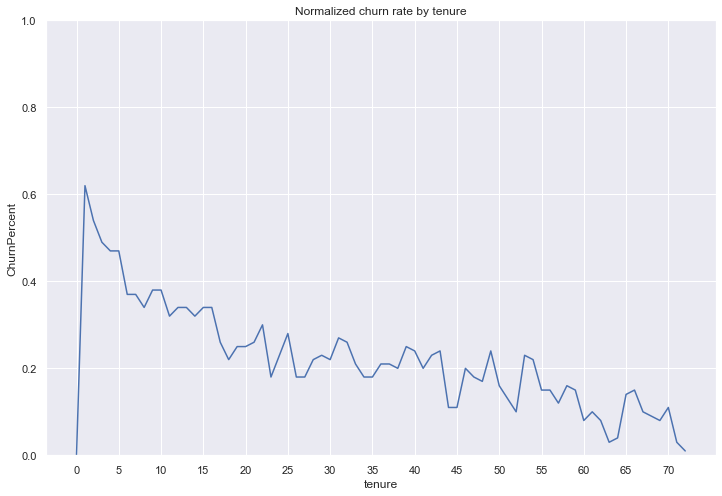

In [33]:
#Normalized line plot of tenure and churnpercent by tenure
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
plt.figure(figsize=(12,8))
g = sns.lineplot(data=churn, x='tenure', y='ChurnPercent')
g.set_ylim([0,1])
g.set_yticks([0,.2,.4,.6,.8,1])
g.set_xticks(ticks)
g.set_title('Normalized churn rate by tenure')

By normalizing the data, we can see the actual rates that customer churn when aggregated by tenure. This is important because while churn rates are high with newer customers, they are still high even with those customers with higher tenure. It makes sense that there would be less customers with higher tenure and the non-normalized chart makes it appear that churn rates are nearly zero, which is not true. Normalizing this data gives us a much better view of the data. I have provided the non-normalized chart below for comparison. 

[]

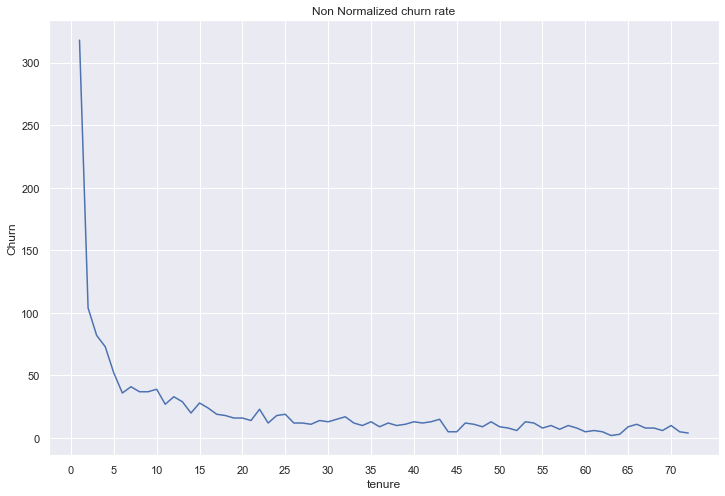

In [34]:
#non normalized plot shown again
plt.figure(figsize=(12,8))
g = sns.lineplot(data=tenure_piv, x='tenure', y='Churn')
g.set_title('Non Normalized churn rate')
g.set_xticks(ticks)
g.plot()

In [35]:
#tenure stats on churners
df[df['Churn'] == 'Yes']['tenure'].describe()

count    1587.000000
mean       18.246377
std        19.667262
min         1.000000
25%         2.000000
50%        10.000000
75%        30.000000
max        72.000000
Name: tenure, dtype: float64

In [36]:
#creating list of categorical column names
col_list = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','InternetType']

Next I want to do some count plots and again use the hue parameter with Churn.  This should give us a good visualization to see any patterns in the data related to Churn.

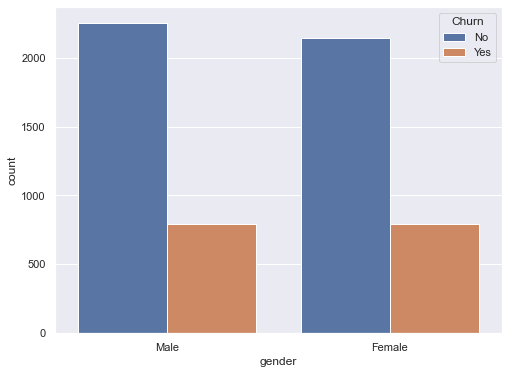

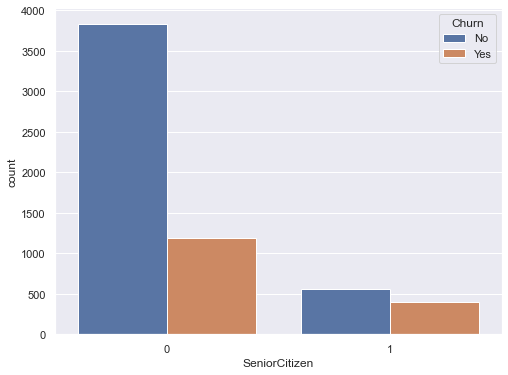

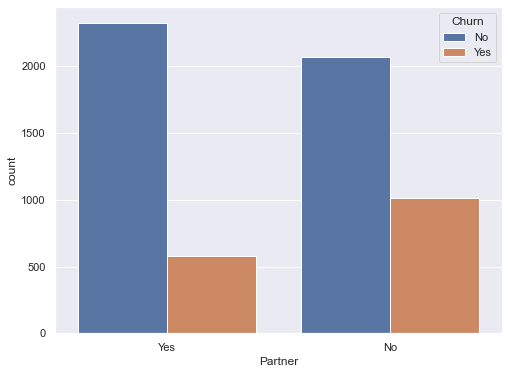

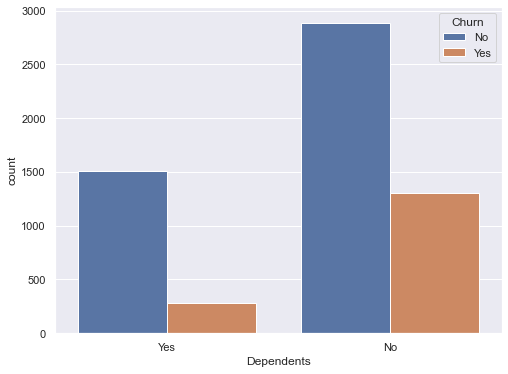

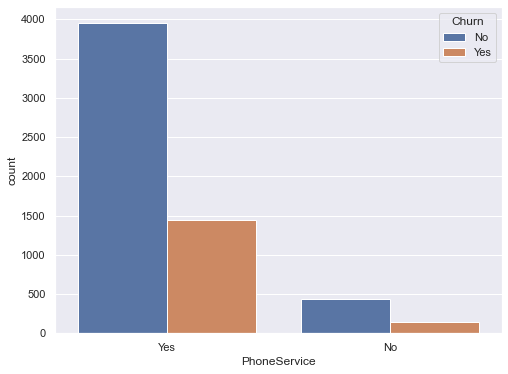

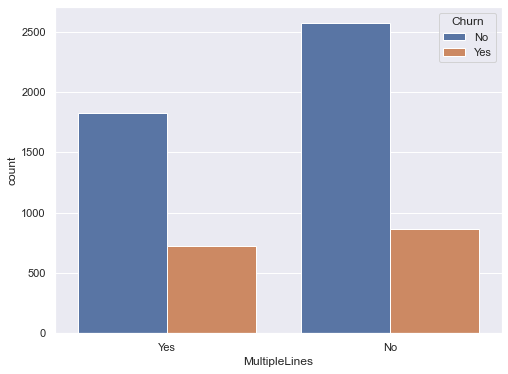

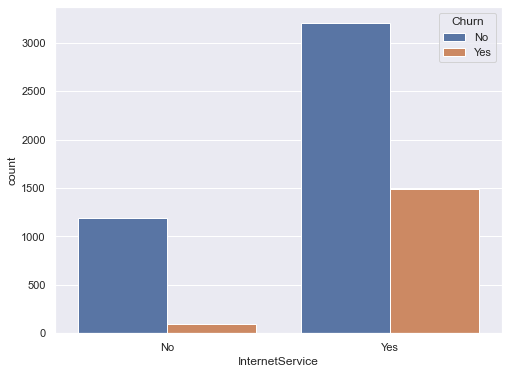

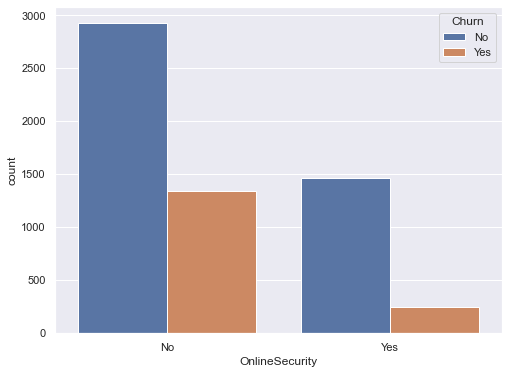

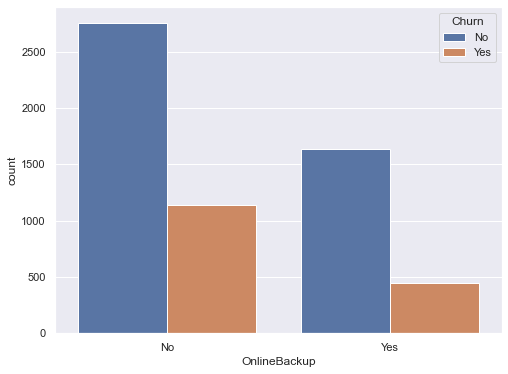

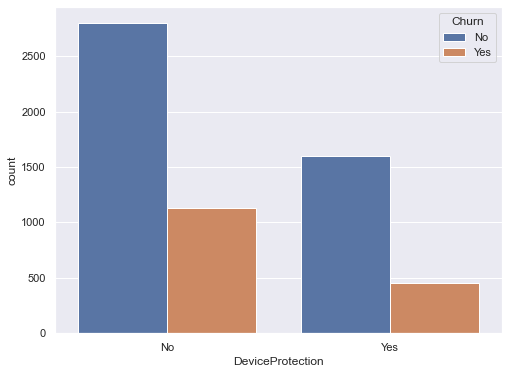

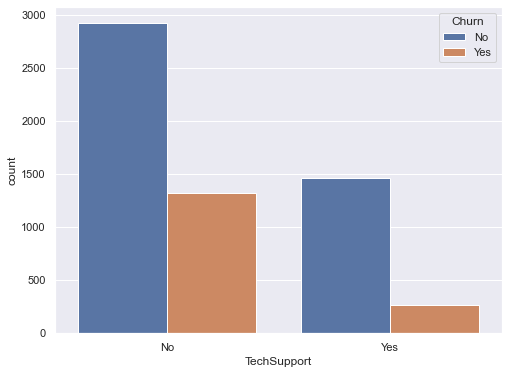

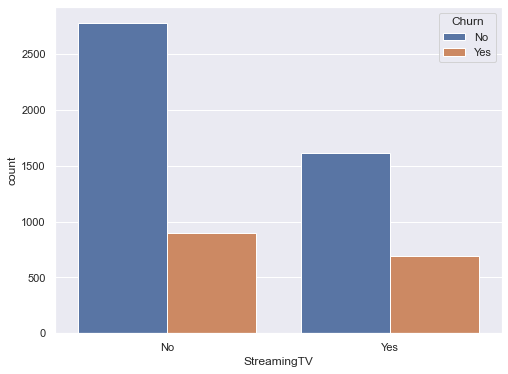

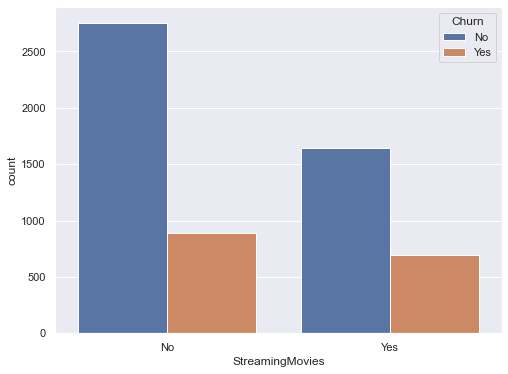

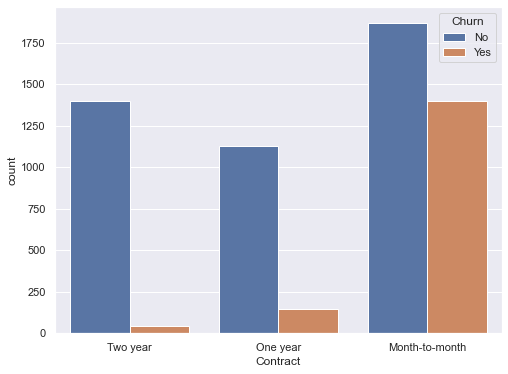

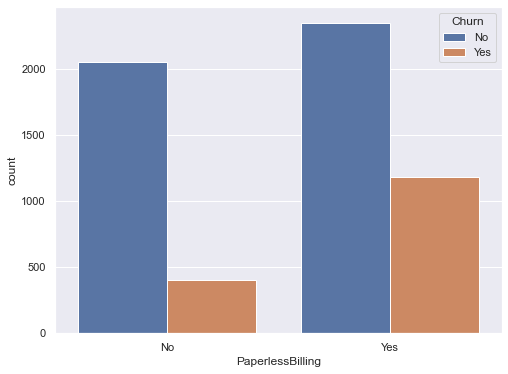

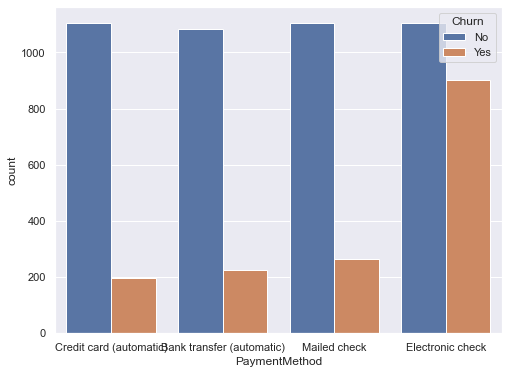

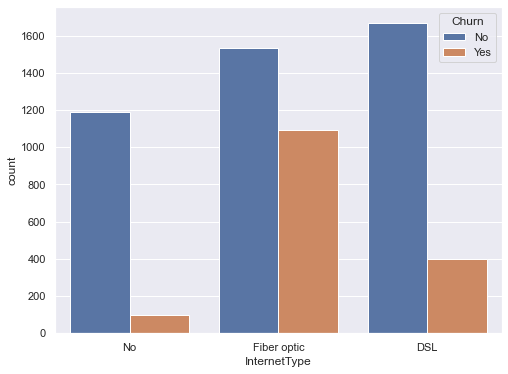

In [37]:
# plotting countplots for all columns with churn as the hue
for i in col_list:
    plt.figure(i, figsize=(8,6))
    sns.countplot(x=i, data=df, hue='Churn')

### Key takeaways from univariate and bivariate analysis
<br>
 - Newer customers are more likely to cancel.
 <br>
 - Churn rates trend downwards with tenure
 <br>
 - Customers on a month to month plan churn at a much higher rate
 <br>
 - Electronic check customers also have a high churn rate
 <br>
 - Fiber optic customers have a much higher churn rate than DSL customers or those without internet service


In [38]:
#dropping the churnpercent before normalizing data
df = df.drop('ChurnPercent', axis=1)

### Normalizing data

In [39]:
#saving temporary dataframe to reset after manual encoding
df_temp = df

In [40]:
#converting data to dummy data (some of this was done before creating charts)
df = df.replace(['No', 'Female'], 0)
df = df.replace(['Yes', 'Male'], 1)
df = pd.get_dummies(data=df, columns=['Contract','PaymentMethod','InternetType'],drop_first=True )

In [41]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetType_DSL,InternetType_Fiber optic
0,1,0,1,1,72,1,1,0,0,0,...,24.10,1734.65,0,0,1,1,0,0,0,0
1,0,0,1,1,72,1,0,0,0,0,...,19.55,1463.45,0,0,1,0,0,0,0,0
2,0,1,1,0,72,1,1,1,1,0,...,78.50,5602.25,0,0,1,0,0,0,0,1
3,0,0,1,1,72,1,1,1,1,1,...,74.55,5430.65,0,0,1,0,0,1,1,0
4,0,0,1,1,72,1,1,0,0,0,...,25.10,1857.85,0,0,1,0,0,0,0,0


In [42]:
#importing sklearn libraries for machine learning model building and testing
from sklearn.model_selection import train_test_split,GridSearchCV, RepeatedStratifiedKFold, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [43]:
#Getting test and train sets split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [44]:
#K nearest neigbor, using elbow method to determine best k value

test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

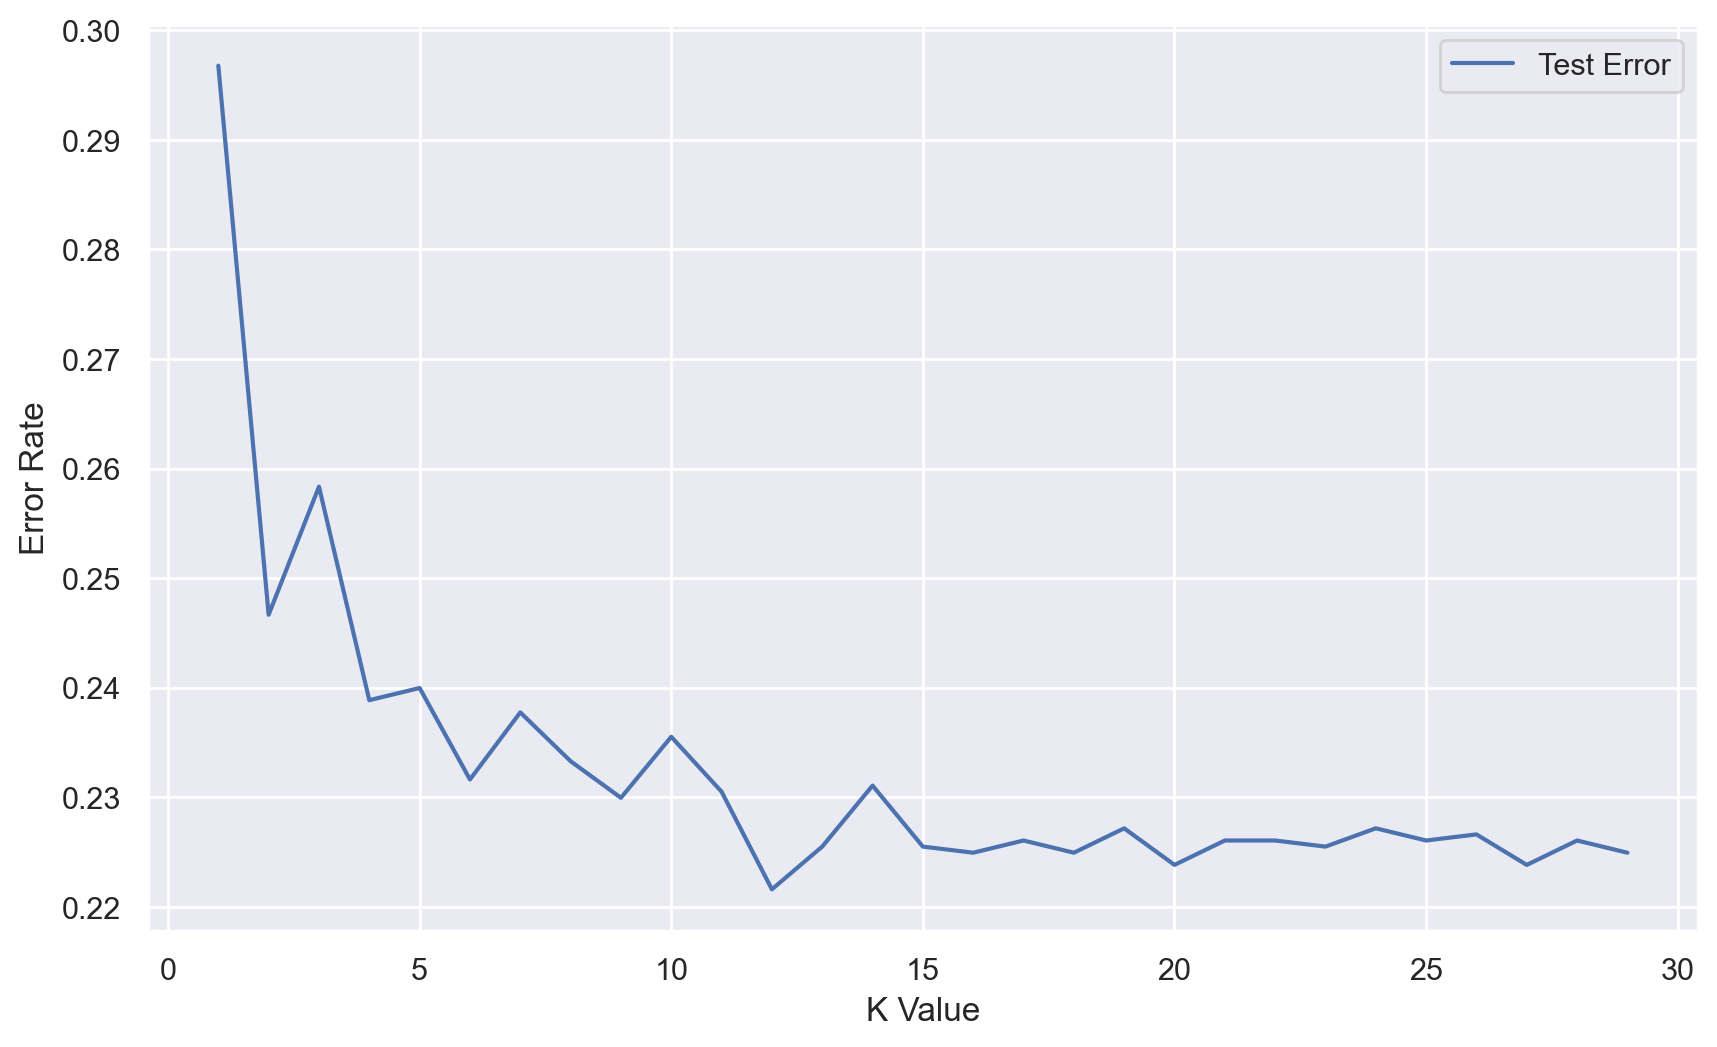

In [45]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')

It looks like the best k value is 12 or 13.  In this section I will use grid search to test various parameters for each algorithm and determine the optimal settings.  I will then fit the model and get metrics on how it performed.  I will gather all the metrics and make a determination at the end.

### Logistic Regression

In [46]:
#start with logistic regression
lr_model = LogisticRegression()

In [47]:
#laying out parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l1', 'l2', 'elasticnet' ]
c_values = [100, 10, 1.0, 0.1, 0.01]

In [48]:
#building my parameter dictionary
grid = dict(solver=solvers, penalty=penalty, C=c_values)

In [49]:
#commenting to avoid computing time when I run the notebook again
#grid_search = GridSearchCV(estimator=lr_model, param_grid=grid, n_jobs=-1, cv=10, scoring='roc_auc', error_score=0)
#grid_result = grid_search.fit(X, y)

In [50]:
#printing out the best score
#print("Best Logistic Regression: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Saving the ouput from the best parameters so I can avoid computing this every time I run the notebook
<br>
Best Logistic Regression: 0.840312 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1310
           1       0.67      0.53      0.59       486

    accuracy                           0.80      1796
   macro avg       0.75      0.72      0.73      1796
weighted avg       0.79      0.80      0.79      1796



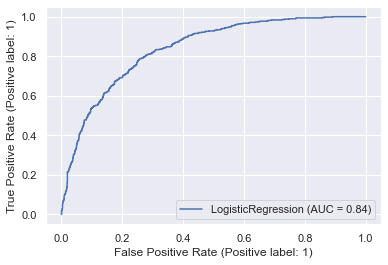

In [51]:
#Logistic regression with tuned parameters
log_reg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)
lr_pred = log_reg.predict(X_test)
print(classification_report(y_test,lr_pred))
metrics.plot_roc_curve(log_reg, X_test, y_test)

# saving metrics
lr_scores = []
lr_scores.append(round(metrics.f1_score(y_test, lr_pred, average='weighted'), 2))
lr_scores.append(round(metrics.balanced_accuracy_score(y_test, lr_pred), 2))
lr_scores.append(round(metrics.roc_auc_score(y_test, lr_pred), 2))

### K Nearest neighbor

In [52]:
#K nearest neighbor
knn_model = KNeighborsClassifier()

I wanted to start with a broad range of parameters for my grid search, it was however time consuming and intensive.  I starte with 50 leaf sizes and 30 n neighbors, but that took a very long time so I scaled it back later.

In [53]:
#parameters for grid search  (note I had some weird issues where I could not create the list from range here)
#Since this amount of parameters I was trying was so broad this took a long time to compute.  I have since scaled this back
#leaf_size 1,50 was killing the output, changed n_neighbors from 1,30 to 1,15 as well
leaf_size = list(range(1,10))
n_neighbors = list(range(1,15))
p = [1,2]

In [54]:
grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [55]:
#commenting to avoid computing time when I run the notebook again
#grid_search = GridSearchCV(estimator=knn_model, param_grid=grid, cv=10, scoring='roc_auc', error_score=0)
#grid_result = grid_search.fit(X, y)

In [56]:
#printing out the best score
#print("Best KNN: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Saving the ouput from the best parameters so I can avoid computing this every time I run the notebook
<br>
Best KNN: 0.689481 using {'leaf_size': 1, 'n_neighbors': 14, 'p': 1}

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1310
           1       0.65      0.36      0.46       486

    accuracy                           0.77      1796
   macro avg       0.72      0.64      0.66      1796
weighted avg       0.76      0.77      0.75      1796



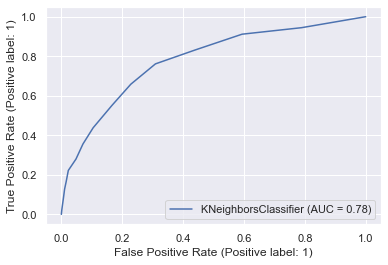

In [57]:
#K nearest neighbor with tuned parameters
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))
metrics.plot_roc_curve(knn, X_test, y_test)

# saving metrics
knn_scores = []
knn_scores.append(round(metrics.f1_score(y_test, knn_pred, average='weighted'), 2))
knn_scores.append(round(metrics.balanced_accuracy_score(y_test, knn_pred), 2))
knn_scores.append(round(metrics.roc_auc_score(y_test, knn_pred), 2))

### Decision Tree

In [58]:
#Decision tree
tree = DecisionTreeClassifier()

In [59]:
#parameters
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [2,4,6,8]

In [60]:
grid = dict(criterion=criterion, splitter=splitter, max_depth=max_depth)

In [61]:
#commenting to avoid computing time when I run the notebook again
#grid_search = GridSearchCV(estimator=tree, param_grid=grid, cv=10, scoring='roc_auc', error_score=0)
#grid_result = grid_search.fit(X, y)

In [62]:
#printing out the best score
#print("Best Tree: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Saving the ouput from the best parameters so I can avoid computing this every time I run the notebook
<br>
Best Tree: 0.799992 using {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1310
           1       0.64      0.42      0.51       486

    accuracy                           0.78      1796
   macro avg       0.73      0.67      0.68      1796
weighted avg       0.76      0.78      0.76      1796



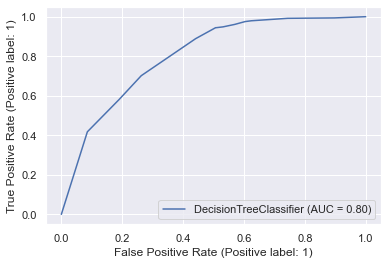

In [63]:
#K nearest neighbor with more performance metrics
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print(classification_report(y_test,tree_pred))
metrics.plot_roc_curve(tree, X_test, y_test)

# saving metrics
tree_scores = []
tree_scores.append(round(metrics.f1_score(y_test, tree_pred, average='weighted'), 2))
tree_scores.append(round(metrics.balanced_accuracy_score(y_test, tree_pred), 2))
tree_scores.append(round(metrics.roc_auc_score(y_test, tree_pred), 2))

### Support Vector Machine

In [64]:
#Decision tree
svm = SVC()

In [65]:
#parameters
gamma = [1, 0.1, 0.01]
C = [0.1, 1, 10, 100]

In [66]:
grid = dict(gamma=gamma, C=C)

In [67]:
#commenting to avoid computing time when I run the notebook again
#grid_search = GridSearchCV(estimator=svm, param_grid=grid, cv=10, scoring='roc_auc', error_score=0)
#grid_result = grid_search.fit(X, y)

In [68]:
#printing out the best score
#print("Best SVM: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Saving the ouput from the best parameters so I can avoid computing this every time I run the notebook
<br>
Best SVM: 0.611480 using {'C': 1, 'gamma': 0.1}

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1310
           1       0.73      0.18      0.29       486

    accuracy                           0.76      1796
   macro avg       0.75      0.58      0.57      1796
weighted avg       0.75      0.76      0.70      1796



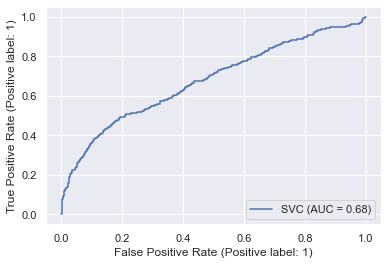

In [69]:
#SVC with more performance metrics
svm = SVC(C=1, gamma=0.1)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))
metrics.plot_roc_curve(svm, X_test, y_test)

# saving metrics
svm_scores = []
svm_scores.append(round(metrics.f1_score(y_test, svm_pred, average='weighted'), 2))
svm_scores.append(round(metrics.balanced_accuracy_score(y_test, svm_pred), 2))
svm_scores.append(round(metrics.roc_auc_score(y_test, svm_pred), 2))

### Naive Bayes

In [70]:
nb = GaussianNB()

In [71]:
#parameters
var_smoothing = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]

In [72]:
grid = dict(var_smoothing=var_smoothing)

In [73]:
#commenting to avoid computing time when I run the notebook again
#grid_search = GridSearchCV(estimator=nb, param_grid=grid, cv=10, scoring='roc_auc', error_score=0)
#grid_result = grid_search.fit(X, y)

In [74]:
#printing out the best score
#print("Best NB: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Saving the ouput from the best parameters so I can avoid computing this every time I run the notebook
<br>
Best NB: 0.824978 using {'var_smoothing': 1e-08}

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1310
           1       0.53      0.74      0.62       486

    accuracy                           0.75      1796
   macro avg       0.71      0.75      0.72      1796
weighted avg       0.79      0.75      0.76      1796



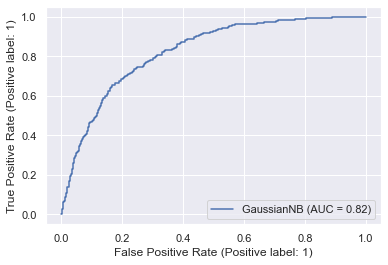

In [75]:
#Naive Bayes with more performance metrics
nb = GaussianNB(var_smoothing=1e-08)
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print(classification_report(y_test,nb_pred))
metrics.plot_roc_curve(nb, X_test, y_test)

# saving metrics
nb_scores = []
nb_scores.append(round(metrics.f1_score(y_test, nb_pred, average='weighted'), 2))
nb_scores.append(round(metrics.balanced_accuracy_score(y_test, nb_pred), 2))
nb_scores.append(round(metrics.roc_auc_score(y_test, nb_pred), 2))

In [76]:
scores = {'Logistic Regression': lr_scores, "K Nearest Neighbor": knn_scores, 'Decision Tree': tree_scores, 
          'Support Vector Machine': svm_scores, 'Naive Bayes': nb_scores}

In [77]:
scores_df = pd.DataFrame.from_dict(scores, columns=['Weighted f1-Score', 'Balanced Accuracy', 'AUC'], orient='index')

In [78]:
scores_df

,Weighted f1-Score,Balanced Accuracy,AUC
Logistic Regression,0.79,0.72,0.72
K Nearest Neighbor,0.75,0.64,0.64
Decision Tree,0.76,0.67,0.67
Support Vector Machine,0.70,0.58,0.58
Naive Bayes,0.76,0.75,0.75


When we look at the scoring metrics it looks like most of the algorithms performed well but the Gaussian Naive bayes performed the best.
<br>
The next step would be testing these algorithms on real-world data and seeing how they perform.  